In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
# loading the dataset
df = pd.read_csv('/workspaces/Portfolio_Project/Dataset/word_develop_ind.csv')
df.head() 

,Country Name,Series Name,2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,Afghanistan,GDP (current US$),12416152732.0567,15856668555.8336,17805098206.3141,19907329777.5872,20146416757.5987,20497128555.6972,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,..
1,Afghanistan,GNI (current US$),12378340930.5187,15885775064.3022,17781511431.23,19961261595.0253,20209353657.8054,20559672324.9094,19249499438.7455,18350475875.2999,18961769787.4548,18294513957.5523,19080662010.7479,20105156769.1907,14352632363.74,14545219074.5763,..
2,Afghanistan,Imports of goods and services (current US$),..,..,..,..,..,..,..,..,..,..,..,7241822542.17594,5288529076.39681,7904463276.83616,..
3,Afghanistan,Exports of goods and services (current US$),..,..,..,..,..,..,..,..,..,..,..,2079570874.83738,2046123147.09236,2665502824.85876,..
4,Afghanistan,"Inflation, consumer prices (annual %)",-6.81116108898993,2.17853752389414,11.8041858089129,6.44121280934117,7.38577178397855,4.67399603536305,-0.66170916471352,4.38389195513893,4.97595150553892,0.626149149168983,2.30237251516819,..,..,..,..


In [59]:
# # Function to clean column names
# def clean_column_name(col):
#     if '[' in col and 'YR' in col and ']' in col:
#         return col.split(' ')[0]
#     return col

# # Apply the function to all column names
# df.columns = [clean_column_name(col) for col in df.columns]

# # Display the cleaned DataFrame columns
# print(df.columns)

## Transforming the gdp dataset and renaming columns

In [60]:
df.columns

Index(['Country Name', 'Series Name', '2009 [YR2009]', '2010 [YR2010]',
       '2011 [YR2011]', '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]',
       '2015 [YR2015]', '2016 [YR2016]', '2017 [YR2017]', '2018 [YR2018]',
       '2019 [YR2019]', '2020 [YR2020]', '2021 [YR2021]', '2022 [YR2022]',
       '2023 [YR2023]'],
      dtype='object')

In [61]:
df_melted = df.melt(id_vars=['Country Name', 'Series Name'], var_name='Year', value_name='Value')
df_melted.head(3)

,Country Name,Series Name,Year,Value
0,Afghanistan,GDP (current US$),2009 [YR2009],12416152732.0567
1,Afghanistan,GNI (current US$),2009 [YR2009],12378340930.5187
2,Afghanistan,Imports of goods and services (current US$),2009 [YR2009],..


In [62]:
type(df_melted)

pandas.core.frame.DataFrame

In [63]:
pivot_df =  df_melted.pivot(index=['Country Name', 'Year'], columns= 'Series Name', values='Value').reset_index()
pivot_df.head(3)

Series Name,Country Name,Year,Exports of goods and services (current US$),GDP (current US$),GNI (current US$),Imports of goods and services (current US$),"Industry (including construction), value added (annual % growth)","Inflation, consumer prices (annual %)","Labor force, total","Population, total"
0,Afghanistan,2009 [YR2009],..,12416152732.0567,12378340930.5187,..,6.10714113128491,-6.81116108898993,6504675,27385307
1,Afghanistan,2010 [YR2010],..,15856668555.8336,15885775064.3022,..,6.27060133814976,2.17853752389414,6738587,28189672
2,Afghanistan,2011 [YR2011],..,17805098206.3141,17781511431.23,..,9.8076704185067,11.8041858089129,7095658,29249157


In [64]:
type(pivot_df)

pandas.core.frame.DataFrame

In [65]:
pivot_df.rename(columns={ 'Labor force, total': 'Labor_Force',            
                    'Country Name': 'Country_Name',
                   'Exports of goods and services (current US$)' : 'Exports',
                   'Imports of goods and services (current US$)' : 'Imports',
                   'Industry (including construction), value added (annual % growth)' : 'Industry_Rate',
                   'Inflation, consumer prices (annual %)' : 'Inflation_Rate',
                   'GDP (current US$)' : 'GDP', 
                    'Population, total': 'Population',
                    'GNI (current US$)': 'GNI',
                }, inplace=True)


In [66]:
renamed_df = pivot_df
renamed_df.head()

Series Name,Country_Name,Year,Exports,GDP,GNI,Imports,Industry_Rate,Inflation_Rate,Labor_Force,Population
0,Afghanistan,2009 [YR2009],..,12416152732.0567,12378340930.5187,..,6.10714113128491,-6.81116108898993,6504675,27385307
1,Afghanistan,2010 [YR2010],..,15856668555.8336,15885775064.3022,..,6.27060133814976,2.17853752389414,6738587,28189672
2,Afghanistan,2011 [YR2011],..,17805098206.3141,17781511431.23,..,9.8076704185067,11.8041858089129,7095658,29249157
3,Afghanistan,2012 [YR2012],..,19907329777.5872,19961261595.0253,..,6.3940710078319,6.44121280934117,7520865,30466479
4,Afghanistan,2013 [YR2013],..,20146416757.5987,20209353657.8054,..,5.06099068169274,7.38577178397855,7881567,31541209


## Cleaning the gdp dataset

In [67]:
renamed_df['Year'] = renamed_df['Year'].str.split(' ', expand=True)[0]
renamed_df.head(2)

Series Name,Country_Name,Year,Exports,GDP,GNI,Imports,Industry_Rate,Inflation_Rate,Labor_Force,Population
0,Afghanistan,2009,..,12416152732.0567,12378340930.5187,..,6.10714113128491,-6.81116108898993,6504675,27385307
1,Afghanistan,2010,..,15856668555.8336,15885775064.3022,..,6.27060133814976,2.17853752389414,6738587,28189672


In [68]:
# check for duplicates
renamed_df.duplicated().sum()

np.int64(0)

In [69]:
renamed_df.shape

(3255, 10)

In [70]:
renamed_df.isna().sum()

Series Name
Country_Name      0
Year              0
Exports           0
GDP               0
GNI               0
Imports           0
Industry_Rate     0
Inflation_Rate    0
Labor_Force       0
Population        0
dtype: int64

In [71]:
renamed_df.dtypes

Series Name
Country_Name      object
Year              object
Exports           object
GDP               object
GNI               object
Imports           object
Industry_Rate     object
Inflation_Rate    object
Labor_Force       object
Population        object
dtype: object

In [72]:
renamed_df.replace('..', np.nan, inplace=True)
renamed_df.head(2)

Series Name,Country_Name,Year,Exports,GDP,GNI,Imports,Industry_Rate,Inflation_Rate,Labor_Force,Population
0,Afghanistan,2009,NaN,12416152732.0567,12378340930.5187,NaN,6.10714113128491,-6.81116108898993,6504675,27385307
1,Afghanistan,2010,NaN,15856668555.8336,15885775064.3022,NaN,6.27060133814976,2.17853752389414,6738587,28189672


In [73]:
renamed_df.isna().sum()

Series Name
Country_Name        0
Year                0
Exports           560
GDP               133
GNI               271
Imports           560
Industry_Rate     469
Inflation_Rate    554
Labor_Force       453
Population          0
dtype: int64

In [74]:
# Drop rows with any NaN values
renamed_df.dropna(inplace=True)

In [75]:
renamed_df.isna().sum()

Series Name
Country_Name      0
Year              0
Exports           0
GDP               0
GNI               0
Imports           0
Industry_Rate     0
Inflation_Rate    0
Labor_Force       0
Population        0
dtype: int64

In [76]:
renamed_df.shape

(2233, 10)

In [77]:
renamed_df.columns

Index(['Country_Name', 'Year', 'Exports', 'GDP', 'GNI', 'Imports',
       'Industry_Rate', 'Inflation_Rate', 'Labor_Force', 'Population'],
      dtype='object', name='Series Name')

In [78]:
cleaned_df = renamed_df[['Country_Name', 'Year', 'Exports', 'Imports', 'GDP', 'Inflation_Rate', 
                         'Industry_Rate', 'Labor_Force', 'Population']]
cleaned_df.head()                      

Series Name,Country_Name,Year,Exports,Imports,GDP,Inflation_Rate,Industry_Rate,Labor_Force,Population
15,Albania,2009,3040047644.65753,6004538203.11457,12044205549.6571,2.26692209450831,1.86202001364686,1258916,2927519
16,Albania,2010,3337086708.7743,5792187274.96813,11926926615.8015,3.62604695579816,3.39983816194058,1270655,2913021
17,Albania,2011,3769456465.06531,6700234587.48787,12890760315.146,3.42912324722163,2.26437554991978,1388801,2905195
18,Albania,2012,3565050512.4285,5860879346.60531,12319834195.331,2.03159268395301,-6.14066215173217,1328695,2900401
19,Albania,2013,3694413338.18786,5999382677.06795,12776224496.9718,1.93762080205229,2.71720448128706,1227940,2895092


In [79]:
cleaned_df.dtypes

Series Name
Country_Name      object
Year              object
Exports           object
Imports           object
GDP               object
Inflation_Rate    object
Industry_Rate     object
Labor_Force       object
Population        object
dtype: object

In [80]:
cleaned_df[['Exports', 'Imports', 'GDP', 'Inflation_Rate', 'Industry_Rate']] = cleaned_df[['Exports', 'Imports', 'GDP', 'Inflation_Rate', 'Industry_Rate']].astype('float')
cleaned_df[['Year' ,'Labor_Force', 'Population']] = cleaned_df[['Year', 'Labor_Force', 'Population']].astype('int')
cleaned_df.dtypes

/tmp/ipykernel_4789/2673528586.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[['Exports', 'Imports', 'GDP', 'Inflation_Rate', 'Industry_Rate']] = cleaned_df[['Exports', 'Imports', 'GDP', 'Inflation_Rate', 'Industry_Rate']].astype('float')
/tmp/ipykernel_4789/2673528586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[['Year' ,'Labor_Force', 'Population']] = cleaned_df[['Year', 'Labor_Force', 'Population']].astype('int')


Series Name
Country_Name       object
Year                int64
Exports           float64
Imports           float64
GDP               float64
Inflation_Rate    float64
Industry_Rate     float64
Labor_Force         int64
Population          int64
dtype: object

In [81]:
cleaned_df.describe()

Series Name,Year,Exports,Imports,GDP,Inflation_Rate,Industry_Rate,Labor_Force,Population
count,2233.000000,2.233000e+03,2.233000e+03,2.233000e+03,2233.000000,2233.000000,2.233000e+03,2.233000e+03
mean,2015.754142,1.355127e+11,1.280421e+11,3.979062e+11,5.922279,2.649504,1.982222e+07,4.367456e+07
std,4.232069,3.105819e+11,2.846527e+11,1.230467e+12,18.391020,11.422225,7.675793e+07,1.590665e+08
min,2009.000000,3.817990e+07,2.015338e+08,3.123777e+08,-16.859691,-77.326017,3.626000e+04,1.049510e+05
25%,2012.000000,4.483693e+09,6.147142e+09,1.370893e+10,1.411939,-0.783988,1.475366e+06,3.371133e+06
50%,2016.000000,1.759096e+10,2.021757e+10,5.049172e+10,3.247588,2.572023,4.393129e+06,9.893082e+06
75%,2019.000000,1.060615e+11,1.033295e+11,2.791167e+11,6.276893,6.148306,1.217643e+07,3.082154e+07
max,2023.000000,3.717888e+12,3.140041e+12,1.788178e+13,557.201817,223.029628,7.818083e+08,1.428628e+09


In [82]:
cleaned_df.Country_Name.describe()

count        2233
unique        161
top       Algeria
freq           15
Name: Country_Name, dtype: object

In [83]:
cleaned_df.columns

Index(['Country_Name', 'Year', 'Exports', 'Imports', 'GDP', 'Inflation_Rate',
       'Industry_Rate', 'Labor_Force', 'Population'],
      dtype='object', name='Series Name')

## Feature Engineering

In [84]:
# create gdp per capita column
cleaned_df['GDP_Per_Capita'] = round(cleaned_df['GDP'] / cleaned_df['Population'], 2)

# Create a new column for the Trade_Rate
cleaned_df['Trade_Rate'] = round(cleaned_df['Exports'] / cleaned_df['Imports'], 2)

# Trade Ratio 
cleaned_df['Trade_Ratio'] = round(cleaned_df['Exports'] / cleaned_df['Imports'], 2)

# round these variables
cleaned_df['Inflation_Rate'] = round(cleaned_df['Inflation_Rate'])
cleaned_df['Industry_Rate'] = round(cleaned_df['Industry_Rate'])

In [85]:
cleaned_df = cleaned_df.apply(lambda x: round(x))
cleaned_df.head()

Series Name,Country_Name,Year,Exports,Imports,GDP,Inflation_Rate,Industry_Rate,Labor_Force,Population,GDP_Per_Capita,Trade_Rate,Trade_Ratio
15,Albania,2009,3.040048e+09,6.004538e+09,1.204421e+10,2.0,2.0,1258916,2927519,4114.0,1.0,1.0
16,Albania,2010,3.337087e+09,5.792187e+09,1.192693e+10,4.0,3.0,1270655,2913021,4094.0,1.0,1.0
17,Albania,2011,3.769456e+09,6.700235e+09,1.289076e+10,3.0,2.0,1388801,2905195,4437.0,1.0,1.0
18,Albania,2012,3.565051e+09,5.860879e+09,1.231983e+10,2.0,-6.0,1328695,2900401,4248.0,1.0,1.0
19,Albania,2013,3.694413e+09,5.999383e+09,1.277622e+10,2.0,3.0,1227940,2895092,4413.0,1.0,1.0


In [86]:
cleaned_df.columns

Index(['Country_Name', 'Year', 'Exports', 'Imports', 'GDP', 'Inflation_Rate',
       'Industry_Rate', 'Labor_Force', 'Population', 'GDP_Per_Capita',
       'Trade_Rate', 'Trade_Ratio'],
      dtype='object', name='Series Name')

In [87]:
cleaned_updated_df = cleaned_df[[
                                 'Year', 'Country_Name', 'GDP_Per_Capita', 
                                 'Trade_Rate', 'Trade_Ratio', 'Inflation_Rate',
                                 'Industry_Rate', 'GDP', 'Labor_Force', 'Population',
                                ]].reset_index(drop=True)
cleaned_updated_df.head()

Series Name,Year,Country_Name,GDP_Per_Capita,Trade_Rate,Trade_Ratio,Inflation_Rate,Industry_Rate,GDP,Labor_Force,Population
0,2009,Albania,4114.0,1.0,1.0,2.0,2.0,1.204421e+10,1258916,2927519
1,2010,Albania,4094.0,1.0,1.0,4.0,3.0,1.192693e+10,1270655,2913021
2,2011,Albania,4437.0,1.0,1.0,3.0,2.0,1.289076e+10,1388801,2905195
3,2012,Albania,4248.0,1.0,1.0,2.0,-6.0,1.231983e+10,1328695,2900401
4,2013,Albania,4413.0,1.0,1.0,2.0,3.0,1.277622e+10,1227940,2895092


## Normalize the data

In [109]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()
# normalized_df = pd.DataFrame(scaler.fit_transform(cleaned_updated_df), columns=cleaned_updated_df.columns)

# # Display the normalized
# # normalized_df.head()

In [110]:
# # # Normalize the data
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()
# df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# # Display the normalized
# df.head()

In [111]:
correlation_observation_df = cleaned_updated_df.drop(columns=['Country_Name', 'Year'], axis=1)

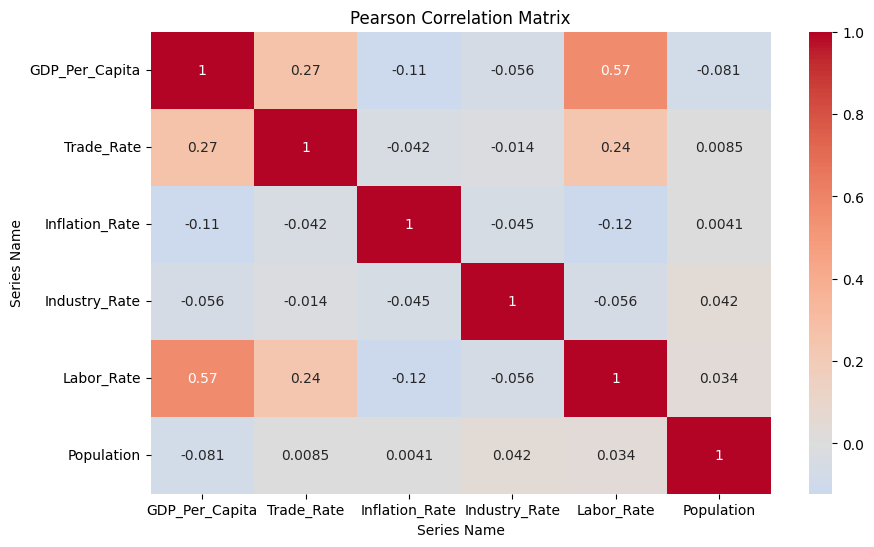

In [112]:
# Pearson correlation
# Calculate the correlation matrix
pearson_corr = correlation_observation_df.corr(method='pearson')

# Visualizing the Pearson correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

In [113]:
# Add new variables 
cleaned_updated_df['Labor_Rate'] = round(cleaned_updated_df['Labor_Force'] / cleaned_updated_df['Population'], 2)

KeyError: 'Labor_Force'

In [93]:
cleaned_updated_df.columns

Index(['Year', 'Country_Name', 'GDP_Per_Capita', 'Trade_Rate', 'Trade_Ratio',
       'Inflation_Rate', 'Industry_Rate', 'GDP', 'Labor_Force', 'Population',
       'Labor_Rate'],
      dtype='object', name='Series Name')

In [94]:
updated_correlation_observation_df = cleaned_updated_df[[
        'GDP_Per_Capita', 'Trade_Rate',
        'Inflation_Rate', 'Industry_Rate', 'Labor_Rate', 'Population'
       ]]

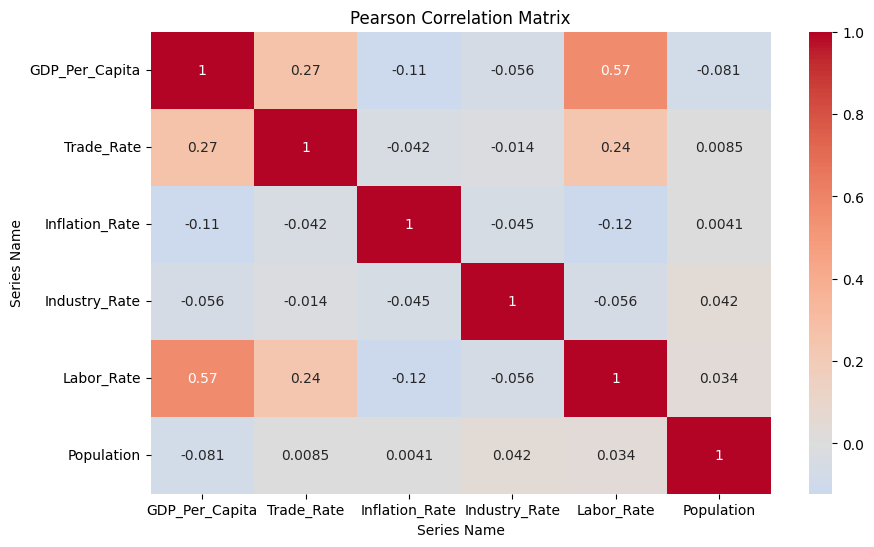

In [95]:
# Pearson correlation
# Calculate the correlation matrix
pearson_corr1 = updated_correlation_observation_df.corr(method='pearson')

# Visualizing the Pearson correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr1, annot=True, cmap='coolwarm', center=0)
plt.title('Pearson Correlation Matrix')
plt.show()

In [96]:
cleaned_updated_df.columns

Index(['Year', 'Country_Name', 'GDP_Per_Capita', 'Trade_Rate', 'Trade_Ratio',
       'Inflation_Rate', 'Industry_Rate', 'GDP', 'Labor_Force', 'Population',
       'Labor_Rate'],
      dtype='object', name='Series Name')

In [97]:
cleaned_updated_df = cleaned_updated_df[[
    'Year', 'Country_Name', 'GDP_Per_Capita', 'Trade_Rate',
       'Inflation_Rate', 'Industry_Rate', 'Labor_Rate', 'Population']]

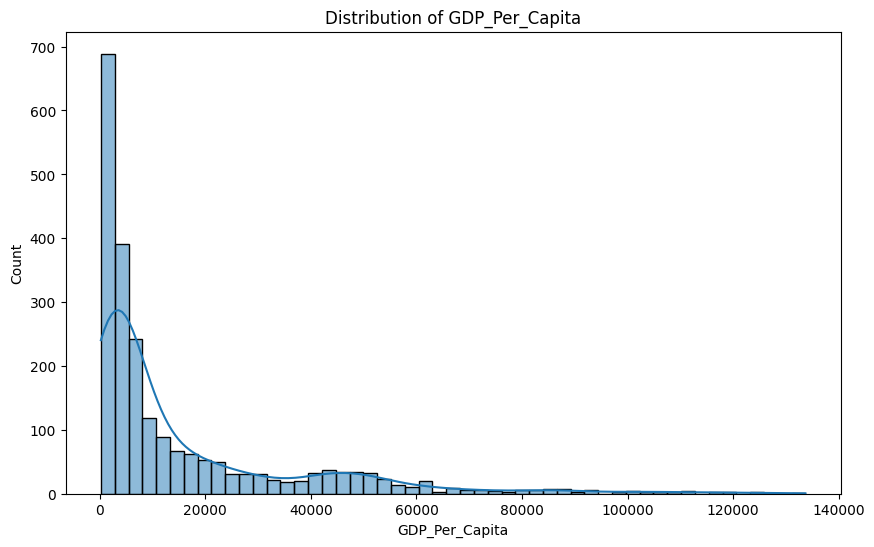

In [98]:
# distribution of the GDP_Per_Capita
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_updated_df['GDP_Per_Capita'], kde=True)
plt.title('Distribution of GDP_Per_Capita')
plt.show()


The histogram revealed a highly skewed distribution with most countries having a GDP per capita below $50,000, suggesting economic disparities among countries.

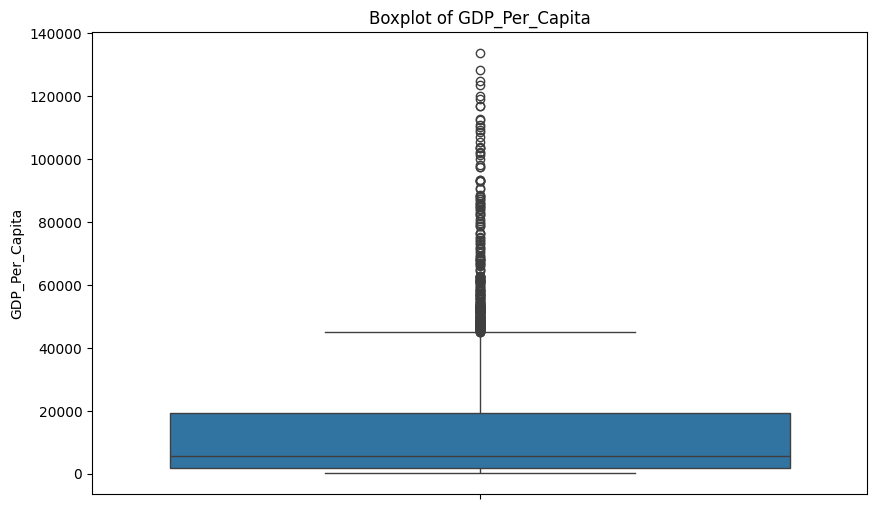

In [ ]:
# find outliers
plt.figure(figsize=(10, 6))
sns.boxplot(cleaned_updated_df['GDP_Per_Capita'])
plt.title('Boxplot of GDP_Per_Capita')
plt.show()

This plot highlighted numerous outliers, indicating that a few countries have significantly higher GDP per capita compared to the majority.

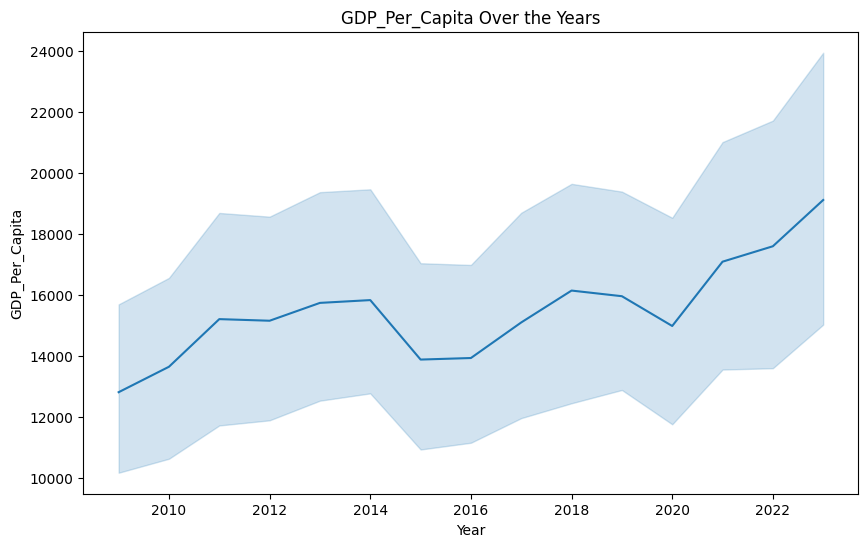

In [100]:
# plot the GDP_Per_Capita over the years put year on ascending order
cleaned_updated_df = cleaned_updated_df.sort_values('Year') 
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='GDP_Per_Capita', data=cleaned_updated_df)
plt.title('GDP_Per_Capita Over the Years')
plt.show()

A line graph showed fluctuations over the years with a general trend of increase, reflecting global economic growth and variability.

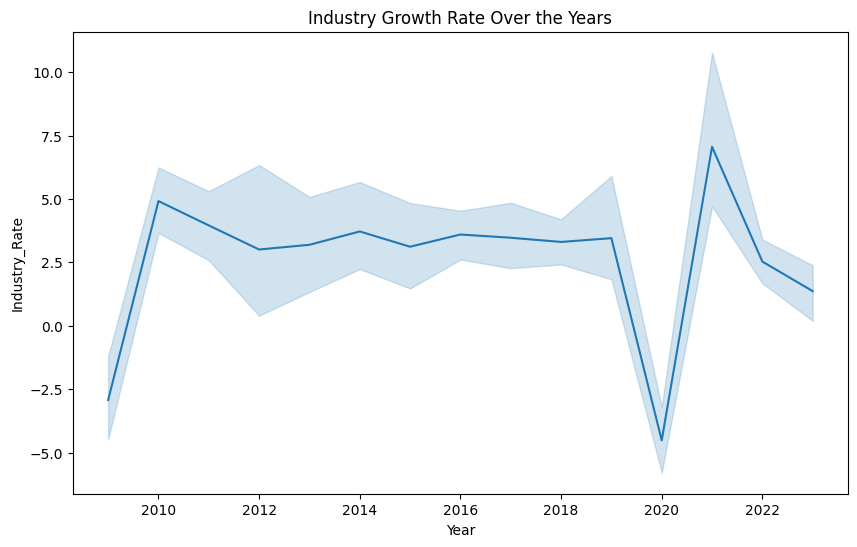

In [101]:
# plot the industry growth rate over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Industry_Rate', data=cleaned_updated_df)
plt.title('Industry Growth Rate Over the Years')
plt.show()

This graph displayed a variable growth rate with periods of decline and recovery, emphasizing the volatile nature of industrial growth.

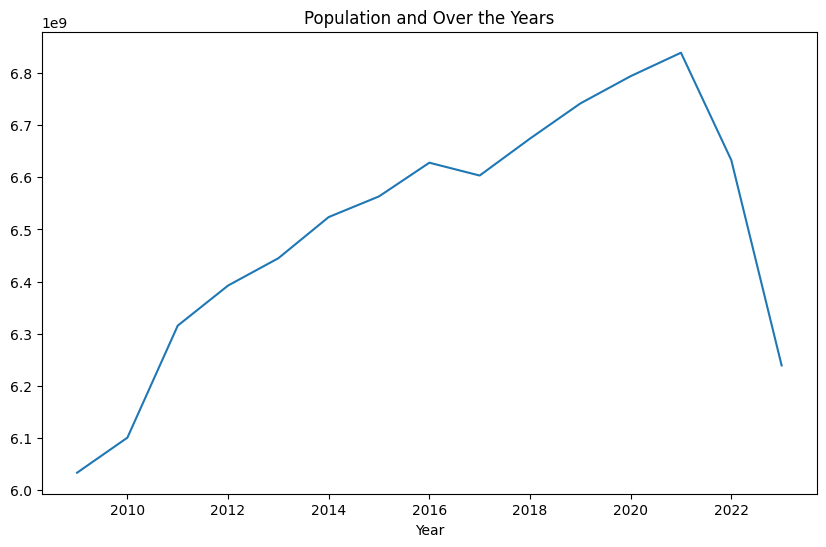

In [102]:
# group by year and the population
population = cleaned_updated_df.groupby('Year')['Population'].sum()

# plot the population over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=population.index, y=population.values)
plt.title('Population and Over the Years')
plt.show()

Illustrated a steady increase in global population, which is a crucial factor in economic scaling and development strategies.

In [106]:
# convert `country name` data type to category
cleaned_updated_df['Country_Name'] = cleaned_updated_df['Country_Name'].astype('category')

In [ ]:
# # onehote encoded
one_hat_encoded_df = pd.get_dummies(cleaned_updated_df, columns=['Country_Name'])
one_hat_encoded_df.head()

,Year,GDP_Per_Capita,Trade_Rate,Inflation_Rate,Industry_Rate,Labor_Rate,Population,Country_Name_Albania,Country_Name_Algeria,Country_Name_Angola,...,Country_Name_United Kingdom,Country_Name_Uruguay,Country_Name_Uzbekistan,Country_Name_Vanuatu,"Country_Name_Venezuela, RB",Country_Name_Viet Nam,Country_Name_West Bank and Gaza,"Country_Name_Yemen, Rep.",Country_Name_Zambia,Country_Name_Zimbabwe
789,2009,2823.0,1.0,2.0,-4.0,0.52,3814419,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1684,2009,60734.0,2.0,-5.0,8.0,0.75,1610274,False,False,False,...,False,False,False,False,False,False,False,False,False,False
502,2009,6738.0,1.0,8.0,-6.0,0.45,4563127,False,False,False,...,False,False,False,False,False,False,False,False,False,False
487,2009,2284.0,1.0,4.0,16.0,0.40,4257230,False,False,False,...,False,False,False,False,False,False,False,False,False,False
479,2009,290.0,1.0,3.0,2.0,0.37,64270232,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [115]:
df_machine_learning = one_hat_encoded_df

In [116]:
# define the target variable
y = df_machine_learning['GDP_Per_Capita']

# define the features
X = df_machine_learning.drop(['GDP_Per_Capita'], axis=1)